In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import calendar

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,3.503290e+05,350329.000000,3.503290e+05,350329.000000,350329.000000,350329.000000,350329.000000,350329.000000,350318.000000,350329.000000,...,266062.000000,265893.000000,350329.000000,350329.000000,350329.000000,350329.000000,280000.000000,350329.000000,338858.000000,53102.000000
mean,1.202309e+08,1.298465,1.001038e+08,38.348033,3846.948617,1951.130514,351609.792895,0.006631,7.351284,0.579090,...,18.648561,0.518081,0.027902,0.168522,0.770841,0.015263,0.015193,0.011954,2.963915,12.628168
std,5.063417e+01,0.633101,3.227503e+05,20.338342,2042.237357,769.827675,1490.949102,0.097167,4.033002,0.793977,...,14.330568,7.161798,0.164693,0.374329,0.420292,0.122596,0.122320,0.108681,7.402934,6.393862
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,...,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,...,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,...,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,...,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,...,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


## What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [4]:
(wego["ADJUSTED_ONTIME_COUNT"].sum()/350329)*100

77.08411236295025

In [5]:
ad_ad = wego["ADHERENCE"].std()

In [6]:
ad_dev = wego["HDWY_DEV"].std()

[Text(0.5, 1.0, 'Adherence Distribution Excluding Outliers'),
 Text(0.5, 0, 'Adherence')]

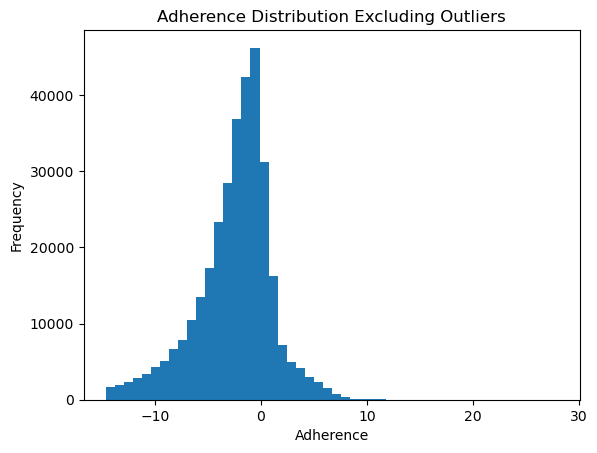

In [7]:
ax = (
    wego[wego['ADHERENCE'].between(ad_ad - ad_dev*3,
                                   ad_ad + ad_dev*3,
                                   inclusive='both')]
    ['ADHERENCE']
    .plot(kind='hist',
          bins=50)
)
ax.set(
    title='Adherence Distribution Excluding Outliers',
    xlabel='Adherence'
    )

In [8]:
hd_mean = wego['HDWY_DEV'].mean()
hd_std = np.std(wego['HDWY_DEV'])

[Text(0.5, 1.0, 'Headway Deviation Distribution Excluding Outliers'),
 Text(0.5, 0, 'Headway Deviation')]

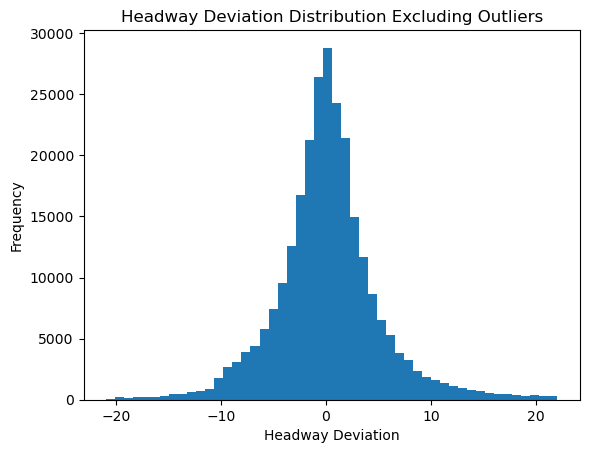

In [9]:
ax = (
    wego[wego['HDWY_DEV'].between(hd_mean - hd_std*3,
                                   hd_mean + hd_std*3,
                                   inclusive='both')]
    ['HDWY_DEV']
    .plot(kind='hist',
          bins=50)
)
ax.set(
    title='Headway Deviation Distribution Excluding Outliers',
    xlabel='Headway Deviation'
    )

## How does direction of travel, route, or location affect the headway and on-time performance?

In [10]:
direction = wego['ROUTE_DIRECTION_NAME'].value_counts().sort_index()

In [11]:
dir_headway = wego[["ROUTE_DIRECTION_NAME","HDWY_DEV", "ADHERENCE"]].groupby('ROUTE_DIRECTION_NAME').mean('HDWY_DEV', 'ADHERENCE')

In [12]:
dir_headway

,HDWY_DEV,ADHERENCE
ROUTE_DIRECTION_NAME,,
FROM DOWNTOWN,0.579990,-3.960287
TO DOWNTOWN,0.447773,-2.321804


In [13]:
route_headway = wego[["ROUTE_ABBR","HDWY_DEV", "ADHERENCE"]].groupby('ROUTE_ABBR').mean('HDWY_DEV', 'ADHERENCE')

In [14]:
route_headway

,HDWY_DEV,ADHERENCE
ROUTE_ABBR,,
3,0.580907,-3.761491
7,0.336808,-3.346555
22,0.955867,-1.138107
23,1.053563,-1.760110
50,0.212376,-2.505022
52,0.974776,-3.971342
55,0.261038,-4.823302
56,0.149213,-2.703988


In [15]:
routedir_headway = wego[["ROUTE_DIRECTION_NAME", "ROUTE_ABBR", "HDWY_DEV", "ADHERENCE"]].groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).mean("HDWY_DEV", "ADHERENCE")

In [16]:
routedir_headway = routedir_headway.reset_index()

In [17]:
routedir_headway.columns

Index(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'HDWY_DEV', 'ADHERENCE'], dtype='object')

In [18]:
##routedir_headway['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'] = routedir_headway.index
##routedir_headway

[Text(0, 0, '3'),
 Text(1, 0, '7'),
 Text(2, 0, '22'),
 Text(3, 0, '23'),
 Text(4, 0, '50'),
 Text(5, 0, '52'),
 Text(6, 0, '55'),
 Text(7, 0, '56')]

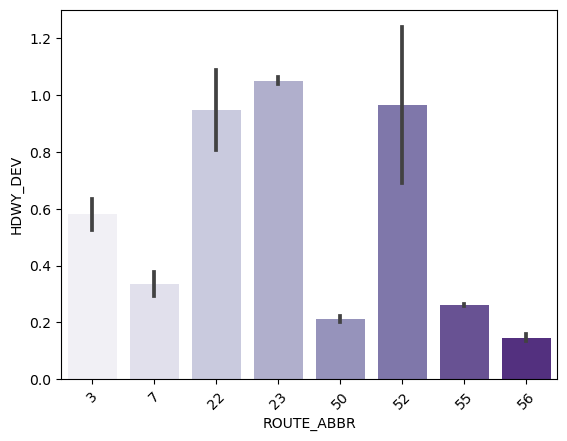

In [19]:
routeplot = sns.barplot(x="ROUTE_ABBR", y="HDWY_DEV",
           data=routedir_headway,
            palette = "Purples")
#rotate labels
routeplot.set_xticklabels(routeplot.get_xticklabels(), rotation=45)

In [20]:
wego['HDWY_PCT'] = (wego['HDWY_DEV'] / wego['SCHEDULED_HDWY'])

In [21]:
wego['BUNCHING'] = wego['HDWY_PCT']< -0.5
wego['GAPPING'] = wego['HDWY_PCT'] > 0.5
wego['ACCEPTABLE'] = (wego['HDWY_PCT'] >= -0.5) & (wego['HDWY_PCT'] <=0.5)

In [22]:
wego[['HDWY_DEV','SCHEDULED_HDWY','HDWY_PCT','BUNCHING', 'GAPPING', 'ACCEPTABLE']].dropna()

,HDWY_DEV,SCHEDULED_HDWY,HDWY_PCT,BUNCHING,GAPPING,ACCEPTABLE
7,2.666666,35.0,0.076190,False,False,True
8,1.966666,35.0,0.056190,False,False,True
9,-0.483334,15.0,-0.032222,False,False,True
11,-2.166667,15.0,-0.144444,False,False,True
12,-3.883334,15.0,-0.258889,False,False,True
...,...,...,...,...,...,...
350320,6.716666,30.0,0.223889,False,False,True
350323,4.916666,30.0,0.163889,False,False,True
350324,5.266666,30.0,0.175556,False,False,True
350326,1.866666,30.0,0.062222,False,False,True


In [23]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_PCT,BUNCHING,GAPPING,ACCEPTABLE
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.500000,NaN,NaN,False,False,False
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,0.0,0,12.866666,5.0,NaN,False,False,False


In [24]:
routedir_headway2 = wego[["ROUTE_DIRECTION_NAME", "ROUTE_ABBR", "ACCEPTABLE"]]

In [25]:
routedir_headway2

,ROUTE_DIRECTION_NAME,ROUTE_ABBR,ACCEPTABLE
0,TO DOWNTOWN,22,False
1,TO DOWNTOWN,22,False
2,TO DOWNTOWN,22,False
3,TO DOWNTOWN,22,False
4,FROM DOWNTOWN,22,False
...,...,...,...
350324,TO DOWNTOWN,7,True
350325,TO DOWNTOWN,7,False
350326,FROM DOWNTOWN,7,True
350327,FROM DOWNTOWN,7,False


In [26]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [27]:
wego[['ROUTE_ABBR','ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'TRIP_EDGE', 'ADHERENCE', 'ACCEPTABLE']]

,ROUTE_ABBR,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,TRIP_EDGE,ADHERENCE,ACCEPTABLE
0,22,0,0,1,1,-2.133333,False
1,22,0,0,1,0,-2.450000,False
2,22,0,0,1,0,-0.933333,False
3,22,0,0,1,2,6.283333,False
4,22,0,0,1,1,-1.583333,False
...,...,...,...,...,...,...,...
350324,7,0,1,0,0,-8.433333,True
350325,7,0,1,0,2,-11.300000,False
350326,7,0,0,1,1,-4.316666,True
350327,7,0,1,0,0,-22.083333,False


In [28]:
route_hd = wego[["ROUTE_DIRECTION_NAME", "ROUTE_ABBR", "BUNCHING", "GAPPING", "ACCEPTABLE"]].groupby(['ROUTE_DIRECTION_NAME', 'ROUTE_ABBR']).mean()
#"BUNCHING", "GAPPING", "ACCEPTED")

In [29]:
route_hd = route_hd.reset_index()

In [30]:
route_hd

,ROUTE_DIRECTION_NAME,ROUTE_ABBR,BUNCHING,GAPPING,ACCEPTABLE
0,FROM DOWNTOWN,3,0.061015,0.077336,0.634672
1,FROM DOWNTOWN,7,0.031294,0.041108,0.569295
2,FROM DOWNTOWN,22,0.015835,0.036525,0.615925
3,FROM DOWNTOWN,23,0.019191,0.045686,0.597828
4,FROM DOWNTOWN,50,0.030540,0.036611,0.733896
5,FROM DOWNTOWN,52,0.076107,0.093992,0.597610
6,FROM DOWNTOWN,55,0.125989,0.118566,0.554286
7,FROM DOWNTOWN,56,0.078452,0.082765,0.666514
8,TO DOWNTOWN,3,0.031303,0.047423,0.699643
9,TO DOWNTOWN,7,0.019876,0.026877,0.596160


<Axes: xlabel='ROUTE_DIRECTION_NAME', ylabel='ACCEPTABLE'>

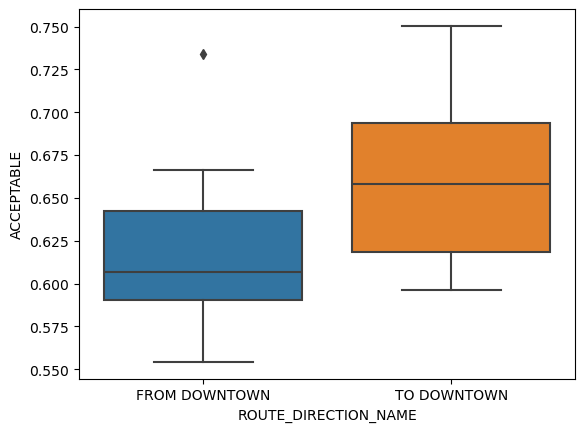

In [31]:
sns.boxplot(data=route_hd, x="ROUTE_DIRECTION_NAME", y="ACCEPTABLE")

In [32]:
wego['DATE'] = pd.to_datetime(wego['DATE'])

In [33]:
wego[['DATE','ROUTE_ABBR','ROUTE_DIRECTION_NAME','ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'GAPPING', 'BUNCHING', 'ACTUAL_HDWY', 'ADHERENCE', 'ACCEPTABLE']]

,DATE,ROUTE_ABBR,ROUTE_DIRECTION_NAME,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,GAPPING,BUNCHING,ACTUAL_HDWY,ADHERENCE,ACCEPTABLE
0,2023-08-01,22,TO DOWNTOWN,0,0,False,False,NaN,-2.133333,False
1,2023-08-01,22,TO DOWNTOWN,0,0,False,False,NaN,-2.450000,False
2,2023-08-01,22,TO DOWNTOWN,0,0,False,False,NaN,-0.933333,False
3,2023-08-01,22,TO DOWNTOWN,0,0,False,False,NaN,6.283333,False
4,2023-08-01,22,FROM DOWNTOWN,0,0,False,False,NaN,-1.583333,False
...,...,...,...,...,...,...,...,...,...,...
350324,2023-09-30,7,TO DOWNTOWN,0,1,False,False,35.266666,-8.433333,True
350325,2023-09-30,7,TO DOWNTOWN,0,1,False,False,NaN,-11.300000,False
350326,2023-09-30,7,FROM DOWNTOWN,0,0,False,False,31.866666,-4.316666,True
350327,2023-09-30,7,FROM DOWNTOWN,0,1,True,False,47.500000,-22.083333,False


In [34]:
# def check_weekday_or_weekend(date):
#     try:
#         given_date = datetime.datetime.strptime(date, '%d %m %Y')
#         day_of_week = (given_date.weekday() + 1) % 7  # Convert Sunday from 6 to 0
        
#         if day_of_week < 5:
#             day_type = 'weekday'
#         else:
#             day_type = 'weekend'
         
    
#         print(f"The day of the week for {given_date.strftime('%Y-%m-%d')} is {day_of_week} ({day_type})")
         
#     except ValueError as e:
#         print(f"Error: {e}")

In [35]:
# date = '21 05 2019'
# check_weekday_or_weekend(date)

In [36]:
wego['DAY_OF_WEEK']= wego['DATE'].dt.day_name()

In [37]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_PCT,BUNCHING,GAPPING,ACCEPTABLE,DAY_OF_WEEK
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,6.500000,NaN,NaN,False,False,False,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,NaN,False,False,False,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,NaN,False,False,False,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,NaN,0,0.000000,NaN,NaN,False,False,False,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0.0,0,12.866666,5.0,NaN,False,False,False,Tuesday


In [38]:
route_headway = wego[["DAY_OF_WEEK", "ROUTE_DIRECTION_NAME", "ROUTE_ABBR", "BUNCHING", "GAPPING", "ACCEPTABLE"]].groupby(['DAY_OF_WEEK', 'ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).mean().reset_index()

In [39]:
route_headway

,DAY_OF_WEEK,ROUTE_ABBR,ROUTE_DIRECTION_NAME,BUNCHING,GAPPING,ACCEPTABLE
0,Friday,3,FROM DOWNTOWN,0.075982,0.095869,0.590005
1,Friday,3,TO DOWNTOWN,0.040558,0.058900,0.674503
2,Friday,7,FROM DOWNTOWN,0.039526,0.052042,0.550066
3,Friday,7,TO DOWNTOWN,0.035813,0.038567,0.573003
4,Friday,22,FROM DOWNTOWN,0.023556,0.052889,0.583111
...,...,...,...,...,...,...
107,Wednesday,52,TO DOWNTOWN,0.035740,0.052644,0.687032
108,Wednesday,55,FROM DOWNTOWN,0.136664,0.132387,0.526050
109,Wednesday,55,TO DOWNTOWN,0.095799,0.103973,0.591142
110,Wednesday,56,FROM DOWNTOWN,0.091925,0.093093,0.645812


In [40]:
route_headway2 = wego[["DAY_OF_WEEK", "ROUTE_DIRECTION_NAME", "ROUTE_ABBR", "ACCEPTABLE"]].groupby(['DAY_OF_WEEK', 'ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).sum().reset_index()

In [41]:
route_headway2

,DAY_OF_WEEK,ROUTE_ABBR,ROUTE_DIRECTION_NAME,ACCEPTABLE
0,Friday,3,FROM DOWNTOWN,2314
1,Friday,3,TO DOWNTOWN,2611
2,Friday,7,FROM DOWNTOWN,835
3,Friday,7,TO DOWNTOWN,832
4,Friday,22,FROM DOWNTOWN,1312
...,...,...,...,...
107,Wednesday,52,TO DOWNTOWN,2845
108,Wednesday,55,FROM DOWNTOWN,2706
109,Wednesday,55,TO DOWNTOWN,3110
110,Wednesday,56,FROM DOWNTOWN,3871


In [42]:
count_day2 = wego.groupby('DAY_OF_WEEK').size()

In [43]:
count_day2

DAY_OF_WEEK
Friday       58473
Monday       49116
Saturday     37497
Sunday       29828
Thursday     58456
Tuesday      58432
Wednesday    58527
dtype: int64

In [44]:
days_week_hdwy = wego.groupby('DAY_OF_WEEK')['HDWY_DEV'].mean()

In [45]:
days_week_hdwy

DAY_OF_WEEK
Friday       0.669558
Monday       0.283814
Saturday     0.645084
Sunday       0.967552
Thursday     0.534189
Tuesday      0.385635
Wednesday    0.378740
Name: HDWY_DEV, dtype: float64

C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DAY_OF_WEEK', ylabel='ACCEPTABLE'>

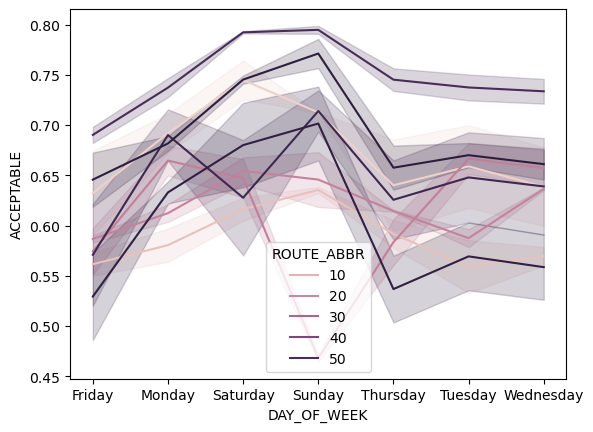

In [46]:
sns.lineplot(data=route_headway,  x="DAY_OF_WEEK", y="ACCEPTABLE", hue="ROUTE_ABBR")

C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DAY_OF_WEEK', ylabel='ACCEPTABLE'>

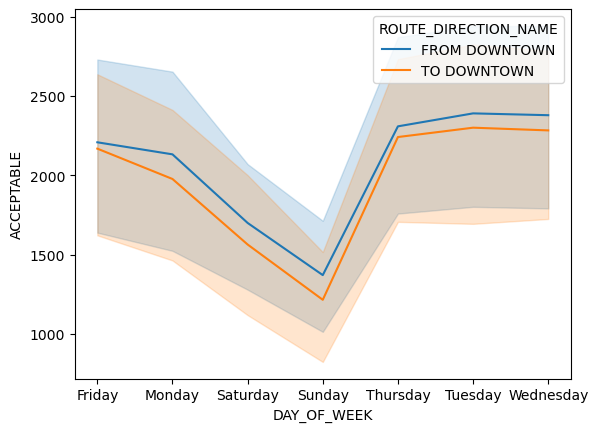

In [47]:
sns.lineplot(data=route_headway2,  x="DAY_OF_WEEK", y="ACCEPTABLE", hue="ROUTE_DIRECTION_NAME")

In [48]:
route_sorted = route_headway2.sort_values('ACCEPTABLE', ascending=False)

In [49]:
route_sorted

,DAY_OF_WEEK,ROUTE_ABBR,ROUTE_DIRECTION_NAME,ACCEPTABLE
94,Tuesday,56,FROM DOWNTOWN,3930
110,Wednesday,56,FROM DOWNTOWN,3871
78,Thursday,56,FROM DOWNTOWN,3799
14,Friday,56,FROM DOWNTOWN,3695
30,Monday,56,FROM DOWNTOWN,3373
...,...,...,...,...
55,Sunday,23,TO DOWNTOWN,608
34,Saturday,7,FROM DOWNTOWN,606
53,Sunday,22,TO DOWNTOWN,572
50,Sunday,7,FROM DOWNTOWN,521


In [50]:
day_adh = wego[['DAY_OF_WEEK','ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'GAPPING', 'BUNCHING', 'ACTUAL_HDWY','ACCEPTABLE']].groupby('DAY_OF_WEEK').mean().reset_index()

In [51]:
day_adh

,DAY_OF_WEEK,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,GAPPING,BUNCHING,ACTUAL_HDWY,ACCEPTABLE
0,Friday,0.026542,0.211876,0.717818,0.083987,0.068886,17.025434,0.598806
1,Monday,0.033899,0.122262,0.820893,0.052529,0.045627,17.311222,0.669334
2,Saturday,0.021895,0.179934,0.772382,0.037256,0.027709,25.777915,0.696269
3,Sunday,0.028396,0.112176,0.813095,0.034028,0.016193,26.249148,0.693509
4,Thursday,0.026858,0.182479,0.753216,0.073389,0.060302,16.880630,0.622759
5,Tuesday,0.028837,0.164071,0.778717,0.065461,0.055432,16.718724,0.642285
6,Wednesday,0.027936,0.175936,0.769030,0.067576,0.058845,16.723535,0.637330


In [52]:
operator = wego[['ROUTE_ABBR', 'OPERATOR','ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'GAPPING', 'BUNCHING', 'ACTUAL_HDWY','ACCEPTABLE']].groupby('OPERATOR').mean().reset_index()

In [53]:
operator

,OPERATOR,ROUTE_ABBR,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,GAPPING,BUNCHING,ACTUAL_HDWY,ACCEPTABLE
0,0,23.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000
1,56,56.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.750000,0.666667
2,235,23.000000,0.083333,0.416667,0.500000,0.166667,0.000000,16.585185,0.583333
3,244,55.000000,0.000000,0.200000,0.800000,0.160000,0.120000,10.062500,0.520000
4,301,55.000000,0.027027,0.459459,0.513514,0.270270,0.108108,12.832222,0.432432
...,...,...,...,...,...,...,...,...,...
336,3149,16.739130,0.043478,0.086957,0.826087,0.043478,0.000000,23.166369,0.565217
337,3156,23.407895,0.000000,0.233553,0.720395,0.016447,0.016447,27.296352,0.723684
338,3165,23.000000,0.000000,0.625000,0.375000,0.250000,0.000000,17.553472,0.500000
339,3166,55.000000,0.000000,0.085714,0.914286,0.000000,0.085714,7.847701,0.742857


In [54]:
operator.describe()

,OPERATOR,ROUTE_ABBR,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,GAPPING,BUNCHING,ACTUAL_HDWY,ACCEPTABLE
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,335.000000,341.000000
mean,2078.401760,38.117964,0.031547,0.186212,0.740772,0.063571,0.056472,18.663198,0.613064
std,780.434072,15.249102,0.041199,0.140423,0.161521,0.049620,0.070159,6.301229,0.139491
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.000000,28.268863,0.007951,0.090909,0.684783,0.031502,0.022556,14.418249,0.581395
50%,2217.000000,40.934874,0.017878,0.156863,0.777607,0.052632,0.046022,17.816733,0.640756
75%,2662.000000,52.000000,0.037088,0.242105,0.843508,0.083721,0.071577,21.983357,0.688062
max,3173.000000,56.000000,0.333333,1.000000,1.000000,0.333333,1.000000,49.659591,0.833333


In [55]:
topops = pd.concat([operator[:5], operator[-5:]])
topops.sort_values(by=['ACCEPTABLE'], inplace= True)
topops.reset_index(drop=True, inplace= True)

In [56]:
topops

,OPERATOR,ROUTE_ABBR,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,GAPPING,BUNCHING,ACTUAL_HDWY,ACCEPTABLE
0,0,23.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000
1,301,55.000000,0.027027,0.459459,0.513514,0.270270,0.108108,12.832222,0.432432
2,3165,23.000000,0.000000,0.625000,0.375000,0.250000,0.000000,17.553472,0.500000
3,244,55.000000,0.000000,0.200000,0.800000,0.160000,0.120000,10.062500,0.520000
4,3149,16.739130,0.043478,0.086957,0.826087,0.043478,0.000000,23.166369,0.565217
5,235,23.000000,0.083333,0.416667,0.500000,0.166667,0.000000,16.585185,0.583333
6,3173,22.000000,0.000000,0.090909,0.909091,0.045455,0.000000,26.985714,0.590909
7,56,56.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.750000,0.666667
8,3156,23.407895,0.000000,0.233553,0.720395,0.016447,0.016447,27.296352,0.723684
9,3166,55.000000,0.000000,0.085714,0.914286,0.000000,0.085714,7.847701,0.742857


In [62]:
##sns.barplot(operator, x="OPERATOR", y="ACTUAL_HDWY")

C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='ACCEPTABLE'>

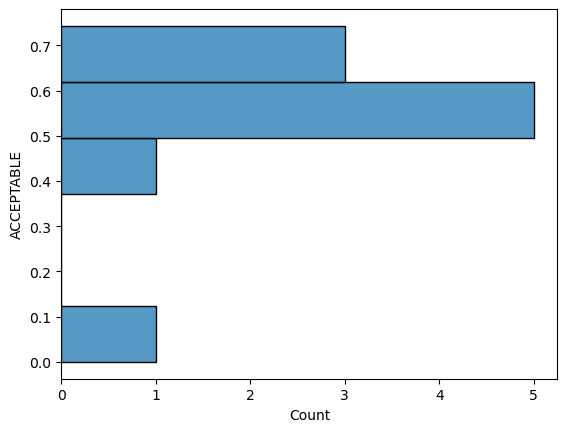

In [64]:
sns.histplot(data=topops, y="ACCEPTABLE")

<Axes: xlabel='ADJUSTED_ONTIME_COUNT', ylabel='ACCEPTABLE'>

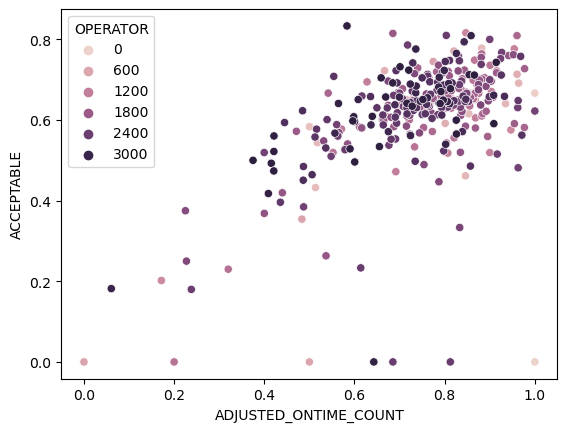

In [70]:
sns.scatterplot(data=operator, x="ADJUSTED_ONTIME_COUNT", y="ACCEPTABLE", hue="OPERATOR")